# Stock market prediction with LSTM  (Long Short Term Memory)
LSTM Any Sequential data

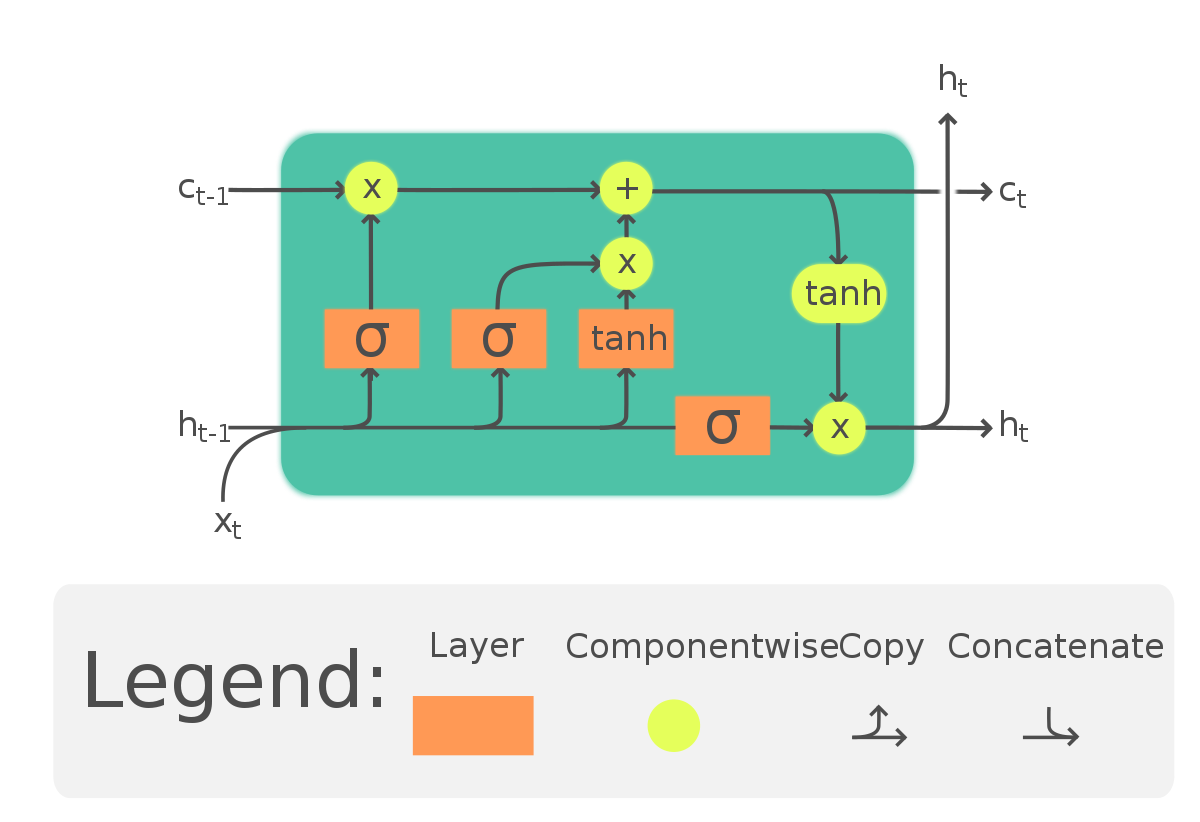

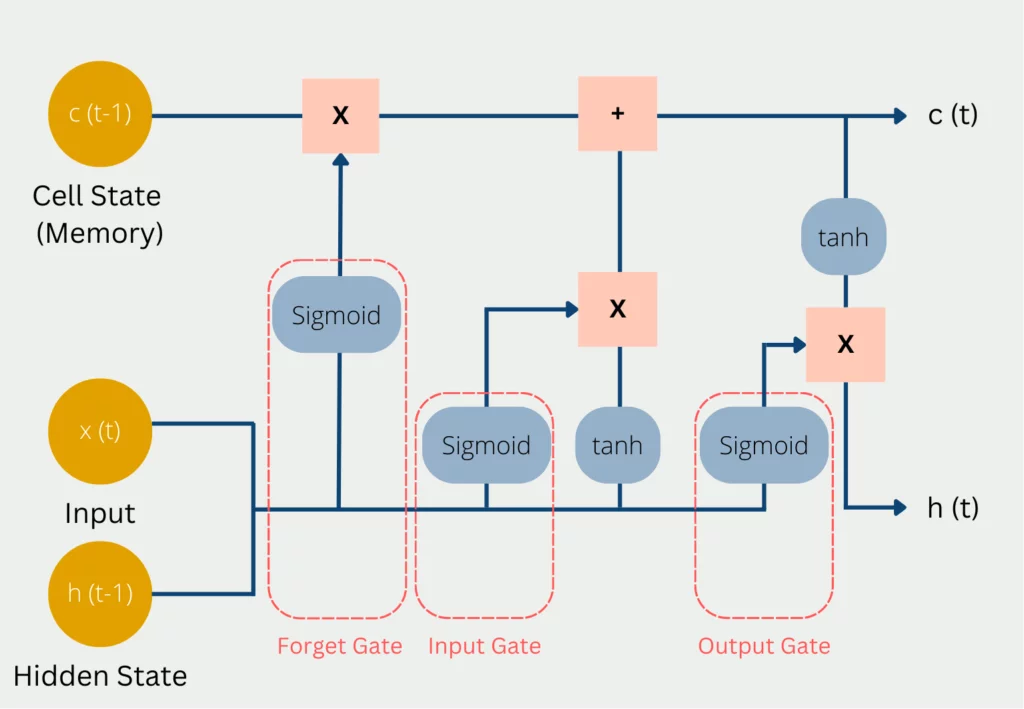

### Reading the stock market data

In [39]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### Restart and run all cells

### Read the stock data for SBI

In [40]:
import yfinance as yf
ticker = 'RELIANCE.NS'
df = yf.download(tickers=ticker, period='1y')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-04,2610.000000,2617.750000,2535.000000,2571.899902,2564.179932,6676577
2022-08-05,2576.000000,2578.800049,2526.949951,2534.000000,2526.393799,6434433
2022-08-08,2531.000000,2583.550049,2531.000000,2567.149902,2559.444092,4691228
2022-08-10,2576.899902,2589.899902,2557.050049,2582.500000,2574.748047,4949442
2022-08-11,2603.100098,2609.899902,2580.199951,2591.100098,2583.322510,3783480


In [41]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-31,2527.850098,2553.899902,2517.949951,2549.250000,2549.250000,4275587
2023-08-01,2555.000000,2559.000000,2505.300049,2513.199951,2513.199951,4768316
2023-08-02,2509.199951,2512.000000,2463.600098,2486.350098,2486.350098,6374107
2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2475.899902,5084175
2023-08-04,2498.800049,2510.000000,2471.600098,2499.050049,2499.050049,7577628


### Visualize the closing price

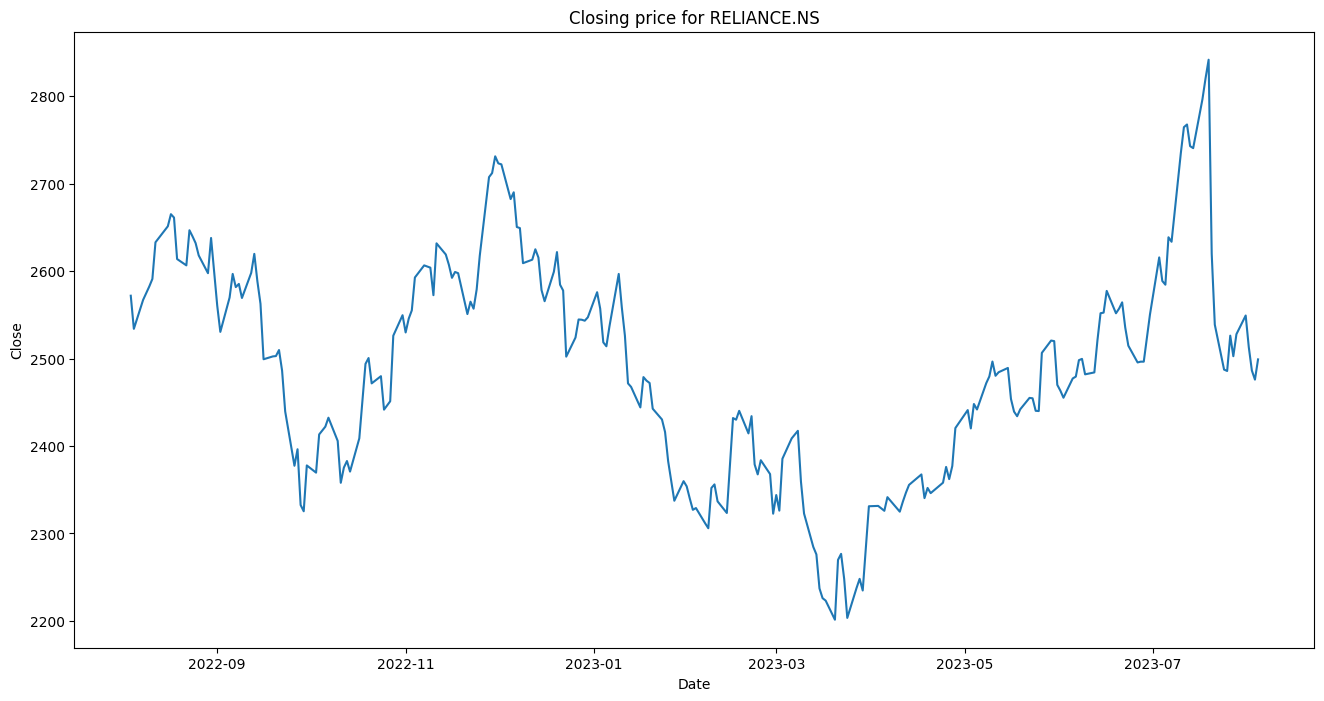

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title(f'Closing price for {ticker}')
plt.show()

### Get the target feature

In [43]:
Y = df[['Close']]

In [44]:
Y.head()

,Close
Date,
2022-08-04,2571.899902
2022-08-05,2534.000000
2022-08-08,2567.149902
2022-08-10,2582.500000
2022-08-11,2591.100098


### Use Min Max scaler to process Y data

In [45]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
y_scl = pd.DataFrame(scaler.fit_transform(Y),columns=Y.columns, index=Y.index)
y_scl

,Close
Date,
2022-08-04,0.578598
2022-08-05,0.519435
2022-08-08,0.571183
2022-08-10,0.595145
2022-08-11,0.608570
...,...
2023-07-31,0.543241
2023-08-01,0.486965
2023-08-02,0.445052


In [46]:
y_scl.shift(1)

,Close
Date,
2022-08-04,NaN
2022-08-05,0.578598
2022-08-08,0.519435
2022-08-10,0.571183
2022-08-11,0.595145
...,...
2023-07-31,0.509835
2023-08-01,0.543241
2023-08-02,0.486965


In [47]:
y_scl.shift(2)

,Close
Date,
2022-08-04,NaN
2022-08-05,NaN
2022-08-08,0.578598
2022-08-10,0.519435
2022-08-11,0.571183
...,...
2023-07-31,0.470574
2023-08-01,0.509835
2023-08-02,0.543241


### Get the lagged data

In [48]:
def get_lagged_data(df,lags):
    for i in range(lags):
        df[f'Lag{i+1}'] = df['Close'].shift(i+1)
    df.dropna(axis=0, inplace=True)  

In [49]:
get_lagged_data(df=y_scl, lags=3)

In [50]:
y_scl

,Close,Lag1,Lag2,Lag3
Date,,,,
2022-08-10,0.595145,0.571183,0.519435,0.578598
2022-08-11,0.608570,0.595145,0.571183,0.519435
2022-08-12,0.673977,0.608570,0.595145,0.571183
2022-08-16,0.702544,0.673977,0.608570,0.595145
2022-08-17,0.724165,0.702544,0.673977,0.608570
...,...,...,...,...
2023-07-31,0.543241,0.509835,0.470574,0.507259
2023-08-01,0.486965,0.543241,0.509835,0.470574
2023-08-02,0.445052,0.486965,0.543241,0.509835


### Seperate X and Y

In [51]:
x_pre = y_scl.drop(columns=['Close'])
y_pre = y_scl[['Close']]

In [52]:
x_pre.head()

,Lag1,Lag2,Lag3
Date,,,
2022-08-10,0.571183,0.519435,0.578598
2022-08-11,0.595145,0.571183,0.519435
2022-08-12,0.608570,0.595145,0.571183
2022-08-16,0.673977,0.608570,0.595145
2022-08-17,0.702544,0.673977,0.608570


In [53]:
y_pre.head()

,Close
Date,
2022-08-10,0.595145
2022-08-11,0.608570
2022-08-12,0.673977
2022-08-16,0.702544
2022-08-17,0.724165


### Train test split the data

In [54]:
n = int(0.8*len(y_pre))
n

196

In [55]:
xtrain, ytrain = x_pre[0:n+1], y_pre[0:n+1]
xtest, ytest = x_pre[n:], y_pre[n:]

In [56]:
xtrain.shape

(197, 3)

In [57]:
xtest.shape

(49, 3)

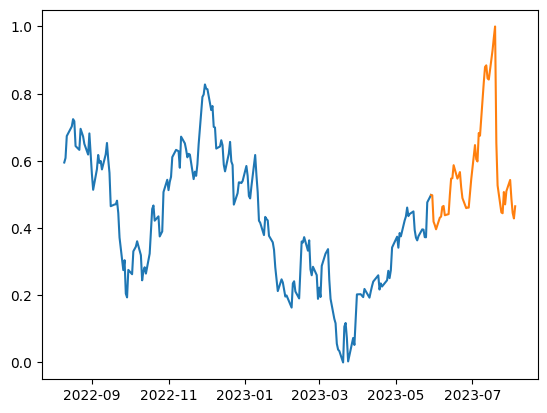

In [58]:
plt.plot(ytrain)
plt.plot(ytest)

### Create LSTM Neural Network

In [59]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [60]:
model = Sequential()

# Layer1 LSTM Layer
model.add(LSTM(64, input_shape=(xtrain.shape[1],1)))

# Layer2 Dense Layer
model.add(Dense(32,activation='relu'))

# Layer3 Dropout
model.add(Dropout(0.2))

# Layer4 Dense Layer
model.add(Dense(16,activation='relu'))

# Dropout
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='linear'))


In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 19521 (76.25 KB)
Trainable params: 19521

In [62]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [63]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 92ms/step - loss: 0.1826 - mae: 0.3870 - val_loss: 0.0574 - val_mae: 0.2216
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.1160 - mae: 0.3005 - val_loss: 0.0267 - val_mae: 0.1465
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0709 - mae: 0.2186 - val_loss: 0.0077 - val_mae: 0.0695
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0339 - mae: 0.1438 - val_loss: 0.0044 - val_mae: 0.0542
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0291 - mae: 0.1411 - val_loss: 0.0098 - val_mae: 0.0876
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0349 - mae: 0.1575 - val_loss: 0.0087 - val_mae: 0.0811
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0284 - mae: 0.1428 - val_loss: 0.0050 - val_mae: 0.0574
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0241 - mae: 0.1277 -

In [64]:
## Evaluate the model in train and test
model.evaluate(xtrain,ytrain)

7/7 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0454


[0.003226221539080143, 0.04542773962020874]

In [65]:
model.evaluate(xtest, ytest)

2/2 [==============================] - 0s 2ms/step - loss: 0.0090 - mae: 0.0662


[0.008986249566078186, 0.06620576232671738]

### Plot the learning curve

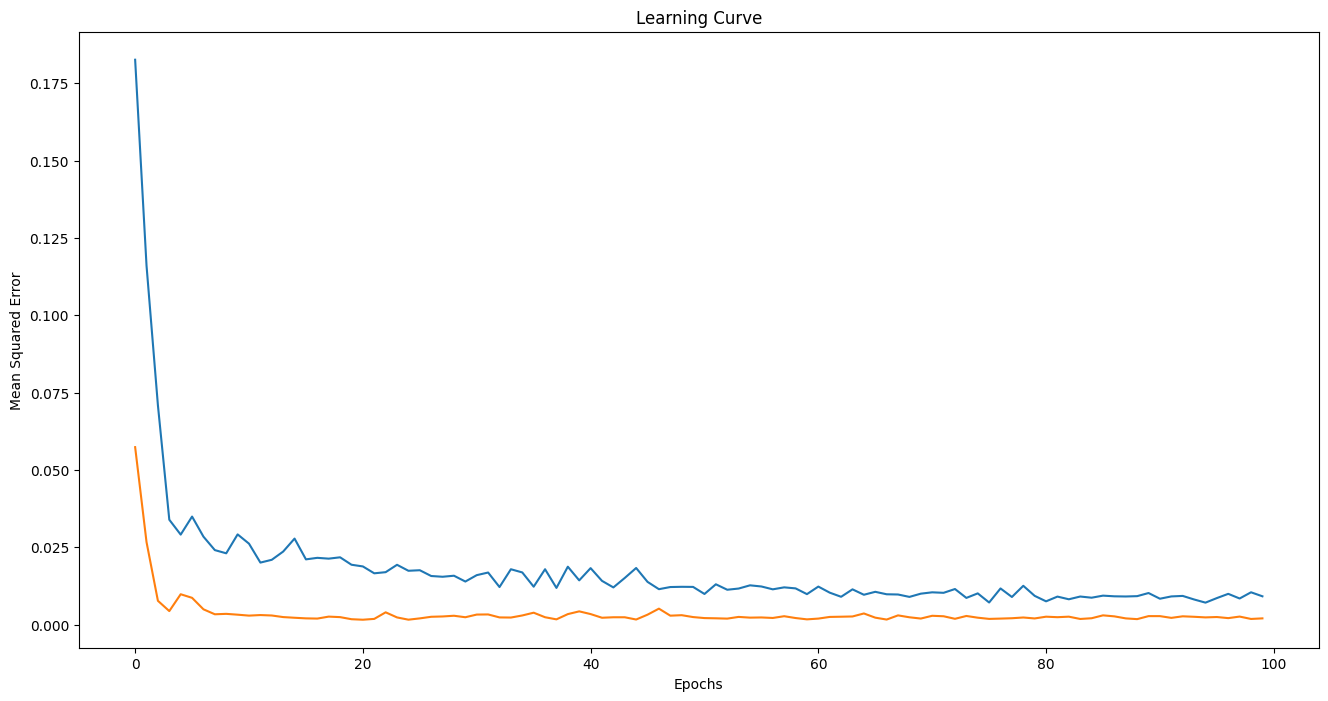

In [66]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

### Predicting the real values

In [67]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

2/2 [==============================] - 0s 3ms/step


In [68]:
ypred_tr[0:5]

array([[0.5443321 ],
       [0.55717134],
       [0.5823875 ],
       [0.61893535],
       [0.65546316]], dtype=float32)

In [69]:
ypred_tr_org = scaler.inverse_transform(ypred_tr)
ypred_ts_org = scaler.inverse_transform(ypred_ts)

In [70]:
ypred_ts_org[0:5]

array([[2462.1143],
       [2491.3882],
       [2511.829 ],
       [2492.8696],
       [2472.336 ]], dtype=float32)

In [71]:
ytrain_org = scaler.inverse_transform(ytrain)
ytest_org = scaler.inverse_transform(ytest)

In [72]:
ytest_org[0:5]

array([[2520.60009766],
       [2519.94995117],
       [2469.89990234],
       [2463.25      ],
       [2455.19995117]])

### Visualize training and testing data

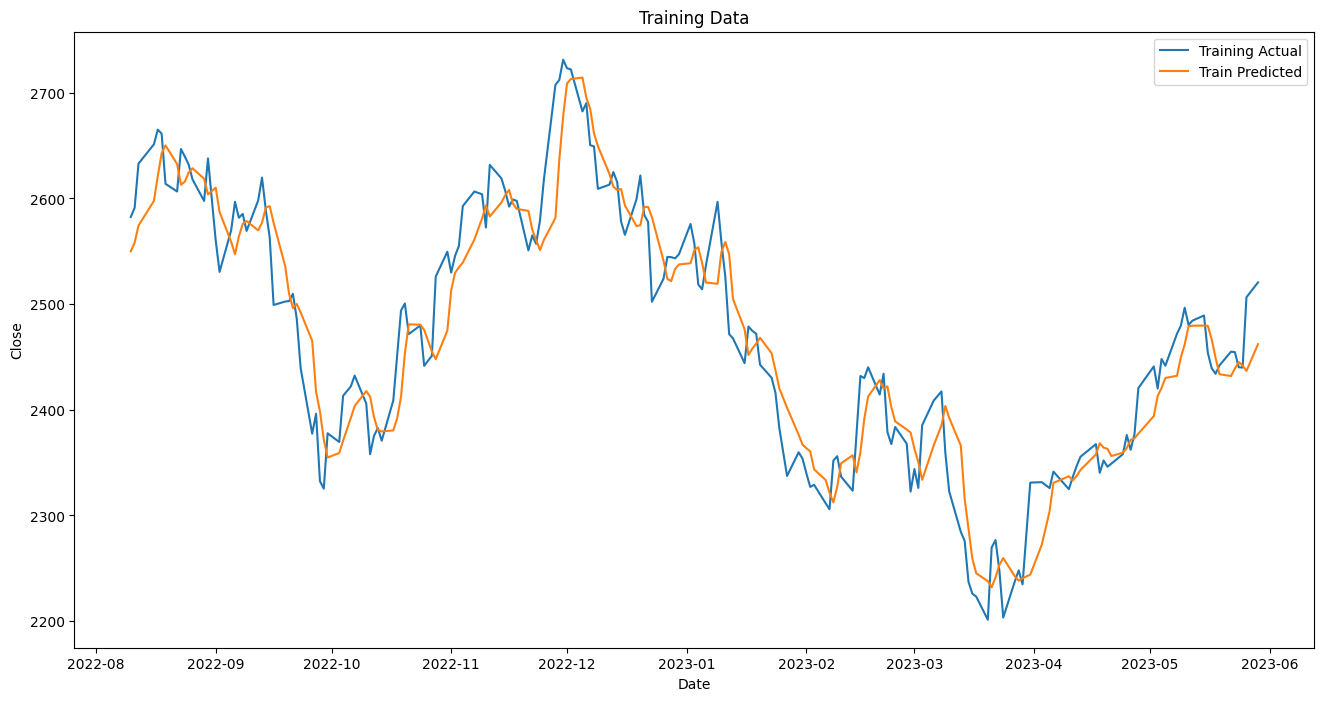

In [73]:
plt.figure(figsize=(16,8))
plt.plot(y_pre.index[0:n+1],ytrain_org,label='Training Actual')
plt.plot(y_pre.index[0:n+1],ypred_tr_org,label='Train Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Training Data')
plt.legend()
plt.show()

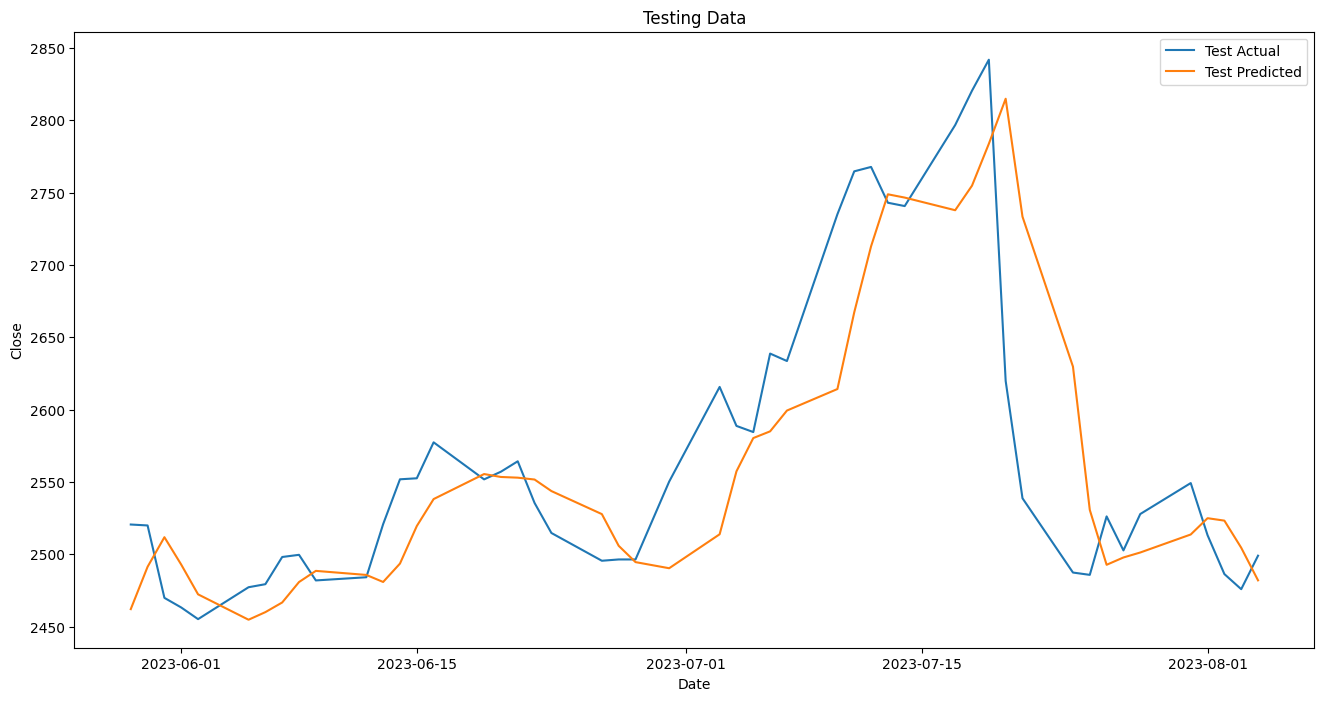

In [74]:
plt.figure(figsize=(16,8))
plt.plot(y_pre.index[n:],ytest_org,label='Test Actual')
plt.plot(y_pre.index[n:],ypred_ts_org,label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Testing Data')
plt.legend()
plt.show()

### Combining train and test plots

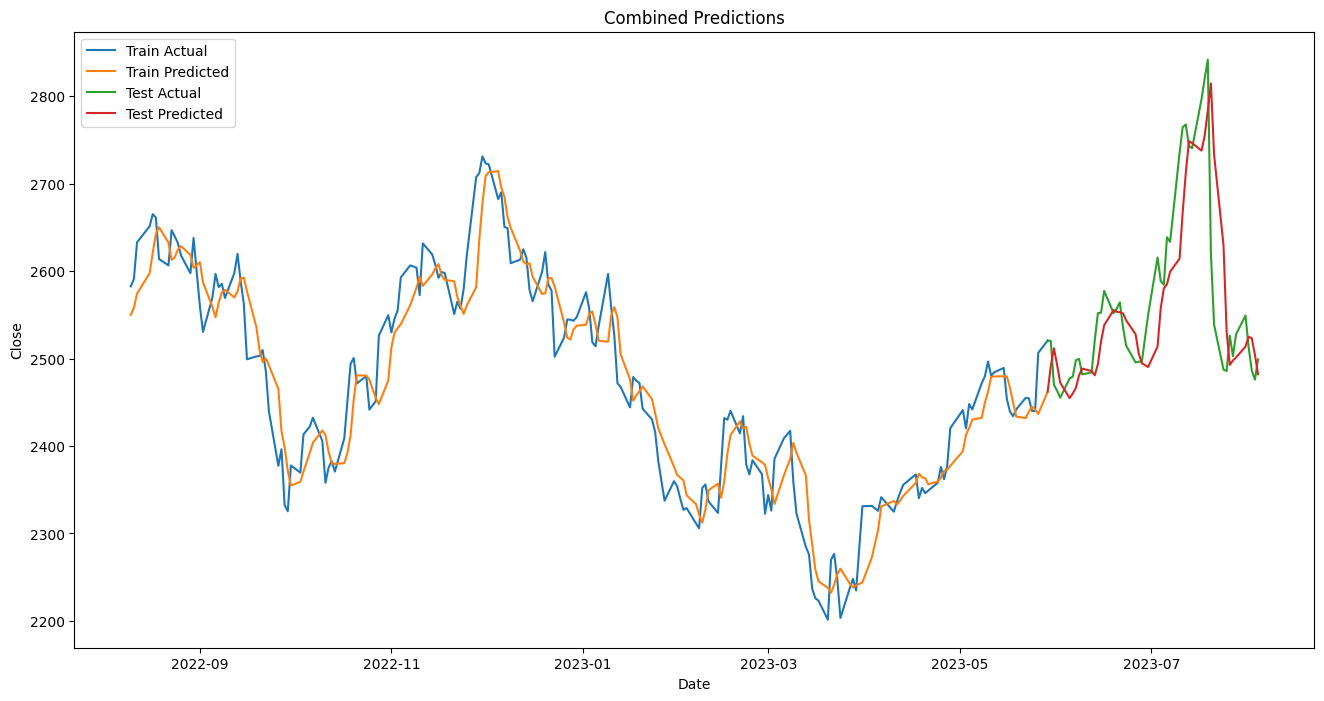

In [75]:
plt.figure(figsize=(16,8))
plt.plot(y_pre.index[0:n+1],ytrain_org,label='Train Actual')
plt.plot(y_pre.index[0:n+1],ypred_tr_org,label='Train Predicted')
plt.plot(y_pre.index[n:],ytest_org,label='Test Actual')
plt.plot(y_pre.index[n:],ypred_ts_org,label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Combined Predictions')
plt.legend()
plt.show()

### Save the model for future use

In [76]:
model.save('RelianceLSTM.keras')